In [ ]:
#word encoding
import numpy as np
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1
max_length = 10
results = np.zeros(shape=(len(samples),max_length,max(token_index.values()) + 1))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1

In [ ]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [ ]:
#character level encoding
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    results[i, j, index] = 1

In [ ]:
results

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
#Using Keras for word-level one-hot encoding
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000) #Creates a tokenizer, configured to only take into account the 1,000 most common words
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples) #Turns strings into lists of integer indices
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 9 unique tokens.


In [ ]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [ ]:
len(word_index)

9

In [ ]:
#Word-level one-hot encoding with hashing trick (toy example)
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000  #Stores the words as vectors of size 1,000. If you have close to 1,000 words (or more), you’ll see many hash collisions,which will decrease the accuracy of this encoding method
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) % dimensionality
    results[i, j, index] = 1.
results.shape

(2, 10, 1000)

In [ ]:
#using word embeddings to reduce dimensionality 
#learning word embeddings with the embeddeding layer
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64) #embedding takes two argument:number of possible tokens and dimensionality of the embeddings



Loading IMDB movie data set 

In [ ]:
# Loading the IMDB data for use with an Embedding layer
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 #number of words to be taken as features
maxlen = 20 #cut off text after 20 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) #loading data as list of integers of only 10,000 words
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen) #converting into 2D tensors where .pad_sequnece would convert all sequences into same length
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17465344/17464789 [==============================] - 3s 0us/step


In [ ]:
x_train

array([[  65,   16,   38, ...,   19,  178,   32],
       [  23,    4, 1690, ...,   16,  145,   95],
       [1352,   13,  191, ...,    7,  129,  113],
       ...,
       [  11, 1818, 7561, ...,    4, 3586,    2],
       [  92,  401,  728, ...,   12,    9,   23],
       [ 764,   40,    4, ...,  204,  131,    9]], dtype=int32)

In [ ]:
#Using an Embedding layer and classifier on the IMDB data
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
model.add(Embedding(10000,8,input_length=maxlen))
model.add(Flatten()) #flattens 3D tensor of embeddings into 2D tensor of shape (samples,maxlength*8)
model.add(Dense(1, activation='sigmoid')) #adding the classifier on top
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 73us/step - loss: 0.6661 - acc: 0.6456 - val_loss: 0.6161 - val_acc: 0.6998
Epoch 2/10
20000/20000 [==============================] - 1s 60us/step - loss: 0.5414 - acc: 0.7535 - val_loss: 0.5266 - val_acc: 0.7296
Epoch 3/10
20000/20000 [==============================] - 1s 58us/step - loss: 0.4619 - acc: 0.7883 - val_loss: 0.5008 - val_acc: 0.7472
Epoch 4/10
20000/20000 [==============================] - 1s 59us/step - loss: 0.4219 - acc: 0.8081 - val_loss: 0.4951 - val_acc: 0.7500
Epoch 5/10
20000/20000 [==============================] - 1s 58us/step - loss: 0.3940 - acc: 0.8245 - val_loss: 0.4941 - val_acc: 0.7524
Epoch 6/10
20000/20000 [==============================] - 1s 58us/step - loss: 0.3712 - acc: 0.8368 - val_loss: 0.4968 - val_acc: 0.7530
Epoch 7/10
20000/20000 [==============================] - 1s 59us/step - loss: 0.3507 - acc: 0.8484 - val_loss: 0.5008 - val_acc:

**Loading Data from scratch**

Using pretrained word embeddings

In [ ]:
import os
print(os.listdir("/content/drive/My Drive/imdb data/data"))
print(os.listdir("/content/drive/My Drive/imdb data/data/train"))

['.DS_Store', 'test', 'train']
['pos', 'neg']


In [ ]:
#positive review
f = open("/content/drive/My Drive/imdb data/data/train/pos/10002_8.txt")
print(f.read())

I saw this film in a sneak preview, and it is delightful. The cinematography is unusually creative, the acting is good, and the story is fabulous. If this movie does not do well, it won't be because it doesn't deserve to. Before this film, I didn't realize how charming Shia Lebouf could be. He does a marvelous, self-contained, job as the lead. There's something incredibly sweet about him, and it makes the movie even better. The other actors do a good job as well, and the film contains moments of really high suspense, more than one might expect from a movie about golf. Sports movies are a dime a dozen, but this one stands out. <br /><br />This is one I'd recommend to anyone.


In [ ]:
#negative review
z = open ("/content/drive/My Drive/imdb data/data/train/neg/1009_3.txt")
print(z.read())

This movie lacked credibility for two reasons. One, no mayor of a major city, and New York is certainly as major as it gets. Would allow a borough in his city to degenerate into such a violent place to live; especially for voters who could have much to say about his or her future job security. All of the victims in the movie were mostly elderly, Jewish or defenseless. At 62-years of age, I have never seen a movie that depicted such utter lack of respect for authority as this movie did. Even "Escape from New York," which was fictional, up front, i.e. they told you that this was science fiction, didn't resort to such deep-seated violence. In this movie, most of the elderly victims were victimized and yet had guns but were unwilling to use them. Also, in this movie and I have not seen the prior two, is more lawless than the "Escape" movie. Secondly, gangs as far as my research shows have never been as cooperative as this movie makes them out to be. On the one hand they catch a gang member

In [5]:
#processing labels of imdb data set
#let’s collect the individual training reviews into a list of strings, one string per review. I will also collect the review labels (positive/negative) into a labels list.
import os
imdb_dir = "/content/drive/My Drive/imdb data/data"
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

I will restrict the training to only 200 samples

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 #Cuts off reviews after 100 words
training_samples = 200 #Trains on 200 samples
validation_samples = 1000 #Validates on 1000 samples
max_words = 10000 #Considers only the top 10,000 words in the dataset
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

Using TensorFlow backend.


In [7]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 50063 unique tokens.


In [8]:
#padding sequence to ensure that all sequences in the list have same length
from tensorflow.keras.preprocessing.sequence import pad_sequences
data = pad_sequences(sequences, maxlen=maxlen)  #maxlen =100


In [9]:
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (8010, 100)
Shape of label tensor: (8010,)


In [10]:
#shuffling data because first samples are neg then positive
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [11]:
#splitting data
x_train = data[:training_samples] # training_samples = 200 
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples] #validate on 1000 samples
y_val = labels[training_samples: training_samples + validation_samples]

In [18]:
#parsing the glove word embeddings file
glove_dir = '/content/drive/My Drive/glove.6B.zip (Unzipped Files)'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [30]:
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'you': 21,
 'not': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'be': 26,
 'one': 27,
 'he': 28,
 'at': 29,
 'all': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'like': 35,
 'so': 36,
 'from': 37,
 'her': 38,
 'or': 39,
 'if': 40,
 'about': 41,
 'out': 42,
 'just': 43,
 "it's": 44,
 'has': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'more': 49,
 'good': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'she': 55,
 'my': 56,
 'would': 57,
 'time': 58,
 'even': 59,
 'which': 60,
 'only': 61,
 'see': 62,
 'their': 63,
 'really': 64,
 'can': 65,
 'story': 66,
 'had': 67,
 'me': 68,
 'well': 69,
 'were': 70,
 'much': 71,
 'we': 72,
 'than': 73,
 'great': 74,
 'do': 75,
 'other': 76,
 'been': 77,
 'him': 78,
 'get': 79,
 'will': 80,
 'bad': 81,
 'into': 82,
 'be

In [19]:
#Preparing the GloVe word-embeddings matrix
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector        #Words not found in the embedding index will be all zeros. 

In [32]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [ 0.60074002,  0.324     ,  0.72399998, ..., -0.64135998,
        -0.086523  , -0.13375001],
       [ 0.47215   ,  0.10486   ,  0.65965998, ...,  0.033993  ,
        -0.23465   , -0.19327   ],
       [-0.28566   , -0.67711997,  0.4337    , ..., -0.12919   ,
         0.81239003,  0.85789001]])

In [31]:
#DEFINING A MODEL
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen)) #max_words = 10,000, embedding dim = 100, maxlen = 100
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [33]:
#LOADING THE GLOVE EMBEDDINGS IN THE MODEL
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False #the pretrained part should not be updtated

In [34]:
#TRAINING AND EVALUATING THE MODEL
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 1000 samples
Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 2.8940 - acc: 0.4450 - val_loss: 0.8354 - val_acc: 0.5050
Epoch 2/10
200/200 [==============================] - 0s 426us/step - loss: 0.4863 - acc: 0.7700 - val_loss: 0.7166 - val_acc: 0.5370
Epoch 3/10
200/200 [==============================] - 0s 457us/step - loss: 0.4007 - acc: 0.8150 - val_loss: 0.7547 - val_acc: 0.5340
Epoch 4/10
200/200 [==============================] - 0s 428us/step - loss: 0.2242 - acc: 0.9400 - val_loss: 1.1683 - val_acc: 0.5020
Epoch 5/10
200/200 [==============================] - 0s 437us/step - loss: 0.3384 - acc: 0.8300 - val_loss: 0.8740 - val_acc: 0.5020
Epoch 6/10
200/200 [==============================] - 0s 430us/step - loss: 0.1289 - acc: 0.9950 - val_loss: 0.7337 - val_acc: 0.5590
Epoch 7/10
200/200 [==============================] - 0s 423us/step - loss: 0.0981 - acc: 0.9800 - val_loss: 0.8712 - val_acc: 0.5270
Epoch 8/10
200/20

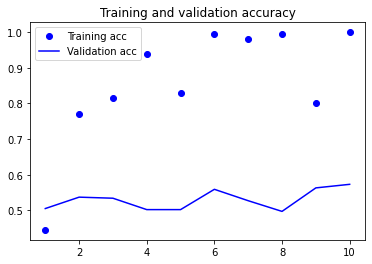

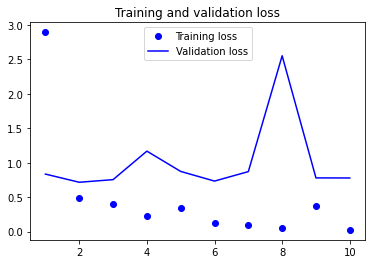

In [37]:
#Plotting the results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The model starts to overfit quickly.This is surprising as there were only 200 samples.

In [38]:
# Training the same model without pretrained word embeddings
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 200 samples, validate on 1000 samples
Epoch 1/10
200/200 [==============================] - 0s 1ms/step - loss: 0.6974 - acc: 0.4350 - val_loss: 0.6904 - val_acc: 0.5250
Epoch 2/10
200/200 [==============================] - 0s 763us/step - loss: 0.5332 - acc: 0.9850 - val_loss: 0.6882 - val_acc: 0.5450
Epoch 3/10
200/200 [==============================] - 0s 711us/step - loss: 0.3246 - acc: 0.9850 - val_loss: 0.6898 - val_acc: 0.5420
Epoch 4/10
200/200 [==============================] - 0s 713us/step - loss: 0.1467 - acc: 1.0000 - val_loss: 0.6926 - val_acc: 0.5440
Epoch 5/10
200/200 [==============================] - 0s 714us/step - loss: 0.0682 - acc: 1.0000 - val_loss: 0.7144 - val_acc: 0.5070
Epoch 6/10
200/200 [==============================] - 0s 730us/step - loss: 0.0367 - acc: 1.0000 - val_loss: 0.7045 - val_acc: 0.5320
Epoch 7/10
200/200 [==============================] - 0s 734us/step - loss: 0.0197 - acc: 1.0000 - val_loss: 0.7058 - val_acc: 0.5350
Epoch 8/10
200/20

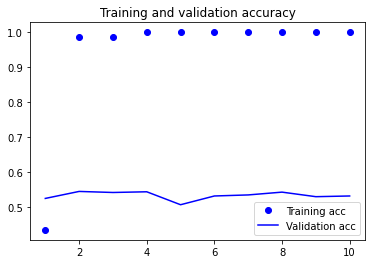

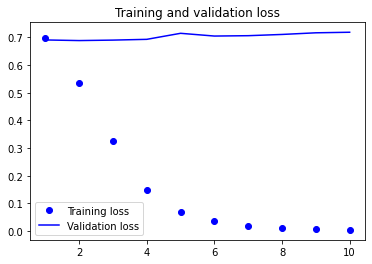

In [39]:
#Plotting 
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Conclusion:  Pretrained word embeddings outperform jointly learned embeddings

In [41]:
#Tokenizing the data of the test set
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in sorted(os.listdir(dir_name)):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [42]:
#evaluating the model on test set 
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

1000/1000 [==============================] - 0s 48us/step


[0.7393519916534423, 0.5770000219345093]

We get an accuracy of 57% just working with handful of examples